In [1]:
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import cv2
import math

In [2]:
global img1
global img2
global img3
img1 = cv2.imread("backpack_left.png")
img2 = cv2.imread('backpack_right.png')
img3 = cv2.imread("lena.png")

In [3]:
def DetectAndCompute(img):
    my_SIFT_instance = cv2.SIFT_create()
#     img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kps, des = my_SIFT_instance.detectAndCompute(img, None)
    matchimg = cv2.drawKeypoints(img, kps, None)

    return matchimg,des,kps

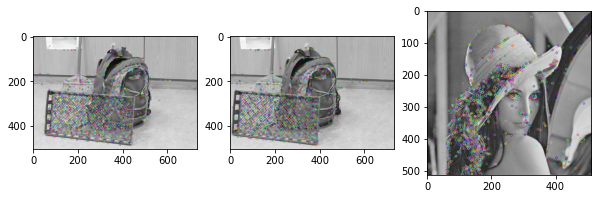

In [4]:
fig = plt.figure(figsize=(10, 7)) #create figure framework
rows = 2
columns = 3

fig.add_subplot(rows, columns, 1)
img1_grey = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img1_show, des1, kps1 = DetectAndCompute(img1_grey)
plt.imshow(cv2.cvtColor(img1_show,cv2.COLOR_BGR2RGB))

fig.add_subplot(rows, columns, 2)
img2_grey = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img2_show, des2, kps2 = DetectAndCompute(img2_grey)
plt.imshow(cv2.cvtColor(img2_show,cv2.COLOR_BGR2RGB))

fig.add_subplot(rows, columns, 3)
img3_grey = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
img3_show, des3, kps3 = DetectAndCompute(img3_grey)
plt.imshow(cv2.cvtColor(img3_show,cv2.COLOR_BGR2RGB))

In [5]:
def MatchDraw(des1, des2, kps1, kps2, img1, img2):
    matches = cv2.BFMatcher().knnMatch(des1, des2, k=2)
    img = np.zeros((img1.shape[0],img1.shape[1]), dtype=np.uint8)
    img_out = cv2.drawMatchesKnn(img1, kps1, img2, kps2, matches, img)
    return img_out

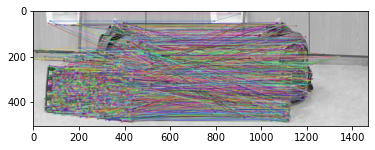

In [6]:
img1_out = MatchDraw(des1, des2, kps1, kps2, img1_grey, img2_grey)
plt.imshow(cv2.cvtColor(img1_out,cv2.COLOR_BGR2RGB))

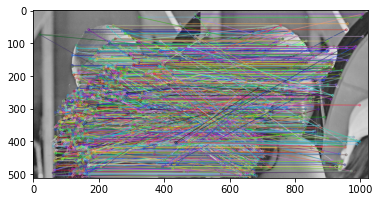

In [7]:
img2_out = MatchDraw(des3, des3, kps3, kps3, img3_grey, img3_grey)
plt.imshow(cv2.cvtColor(img2_out,cv2.COLOR_BGR2RGB))

In [8]:
def MatchDrawUpdate(des1, des2, kps1, kps2, img1, img2):
    matches = cv2.BFMatcher().knnMatch(des1, des2, k=2)
    good = []
    dis = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append([m])
            dis.append(m.distance)
    img = np.zeros((img1.shape[0],img1.shape[1]), dtype=np.uint8)
    img_out = cv2.drawMatchesKnn(img1, kps1, img2, kps2, good, None)
    return img_out, dis

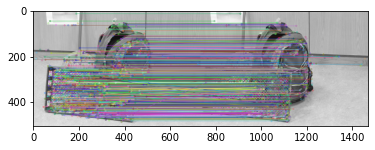

In [9]:
img3_out, dis1 = MatchDrawUpdate(des1, des2, kps1, kps2, img1_grey, img2_grey)
plt.imshow(cv2.cvtColor(img3_out,cv2.COLOR_BGR2RGB))

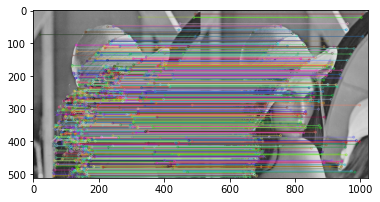

In [10]:
img4_out, dis2 = MatchDrawUpdate(des3, des3, kps3, kps3, img3_grey, img3_grey)
plt.imshow(cv2.cvtColor(img4_out,cv2.COLOR_BGR2RGB))

In [11]:
backpackmatches = cv2.BFMatcher().knnMatch(des1, des2, k=2)
backpackdis = []
lenadis = []
for m,n in backpackmatches:
    md = m.distance
    backpackdis.append(md)
lenamatches = cv2.BFMatcher().knnMatch(des3, des3, k=2)
for m,n in lenamatches:
    ld = m.distance
    lenadis.append(ld)

Text(0.5, 1.0, "Backpack's Histogram")

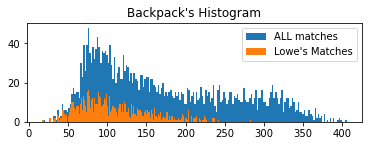

In [14]:
plt.subplot(2,1,1)
plt.hist(backpackdis, 200, label="ALL matches")
plt.hist(dis1, 200, label="Lowe's Matches")
plt.legend()
plt.title("Backpack's Histogram")

Text(0.5, 1.0, "Lena's Histogram")

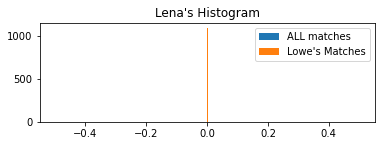

In [17]:
plt.subplot(2,1,2)
plt.hist(lenadis, 200, label="ALL matches")
plt.hist(dis2, 200, label="Lowe's Matches")
plt.legend()
plt.title("Lena's Histogram")

For backpack's histogram, all matches and lowe's matches are different due to the reason that backpack_right and backpack_left are different. This leads to more incorrect matches.
Lena are comparing with itself, so that there is no distance difference between those two images.